In [2]:
import sys
import os

# Get the path to the current working directory
current_dir = os.getcwd()

# Get the path to the parent directory (containing both A.py and 'B' directory)
parent_dir = os.path.dirname(current_dir)

london_data_dir = os.path.join(parent_dir, 'Data/Irish_dataset/preprocessed')
results_dir = os.path.join(current_dir, 'resultsIreland')
# Append the parent directory to the module search path
sys.path.append(parent_dir)

import pickle 
from sklearn.tree import DecisionTreeRegressor, export_text
from scengen.generators import PredClusGenerator, SampleGenerator, RandomGenerator
from sklearn import tree
import pandas as pd
import graphviz


with open(os.path.join(results_dir,"notebooks/resultsFlandersBig/ThesisResults2buffer/PCT_D10_M250_flanders_dataset_with_buffer_feb_0.pkl"), 'rb') as file:
    loaded_model = pickle.load(file)
time_df = pd.read_pickle("notebooks/visualisationresults/t_buffer_feb_flandersbig.pkl")
attributes_df = pd.read_pickle("notebooks/visualisationresults/a_buffer_feb_flandersbig.pkl")
vistree = loaded_model.to_visualization_tree(attributes_df, time_df)


In [3]:
import pandas as pd

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Alternatively, create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# You can print or view the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: injected, Importance: 0.32247488486245385
Feature: tmax, Importance: 0.228437851690356
Feature: consumed, Importance: 0.0966399399015049
Feature: dayOfYear, Importance: 0.09122665812944004
Feature: yearly_consumption, Importance: 0.05569172639304261
Feature: season, Importance: 0.032404181901456504
Feature: prcp, Importance: 0.03006396356967587
Feature: min_weekday, Importance: 0.01783811973401495
Feature: average, Importance: 0.014417993108618273
Feature: tmin, Importance: 0.012289740041206667
Feature: lunch_total_consumption, Importance: 0.012131630414306385
Feature: dayOfMonth, Importance: 0.00804544096835621
Feature: outlier_timing_neg, Importance: 0.0071831939495524706
Feature: night_total_consumption, Importance: 0.006679168892436273
Feature: night_total_consumption_weekday, Importance: 0.00517017360297844
Feature: total_consumption_buffer, Importance: 0.003908671682874263
Feature: morning_total_consumption, Importance: 0.0034430376177580968
Feature: min_weekend, Importa

In [4]:
from data_preprocessing.get_buffer_attributes import BufferAttributesCalculator
calculator = BufferAttributesCalculator(None)
column_names = list(calculator.column_functions.keys())
columns_weekday = [f"{column}_weekday" for column in column_names]
columns_weekend = [f"{column}_weekend" for column in column_names]

In [5]:
import pygraphviz as pgv
from io import StringIO

# DOT data stored in a variable
dot_data = tree.export_graphviz(loaded_model.tree, out_file=None, feature_names=attributes_df.columns.tolist(), filled=True, rounded=True)

# Convert DOT data to a file-like object
dot_file_object = StringIO(dot_data)

# Load DOT data
graph = pgv.AGraph(string=dot_file_object.read())

# List of special attributes
special_attributes = column_names + columns_weekday + columns_weekend

# Function to check if a node label contains a special attribute
def has_special_attribute(label):
    return any(attr in label for attr in special_attributes)
def has_time_attribute(label):
    return any(attr in label for attr in ["TimeFromBuffer"])

# Iterate through nodes and color nodes with special attributes
used_special_attributes = []
for node in graph.nodes():
    if has_special_attribute(node.attr['label']):
        node.attr['fillcolor'] = 'blue'
        special_attributes.append(node.attr['label'])
# for node in graph.nodes():
#     if has_time_attribute(node.attr['label']):
#         node.attr['fillcolor'] = 'green'

# Save the modified DOT file
output_dot_data = graph.to_string()
# Now you can use the modified DOT data as needed



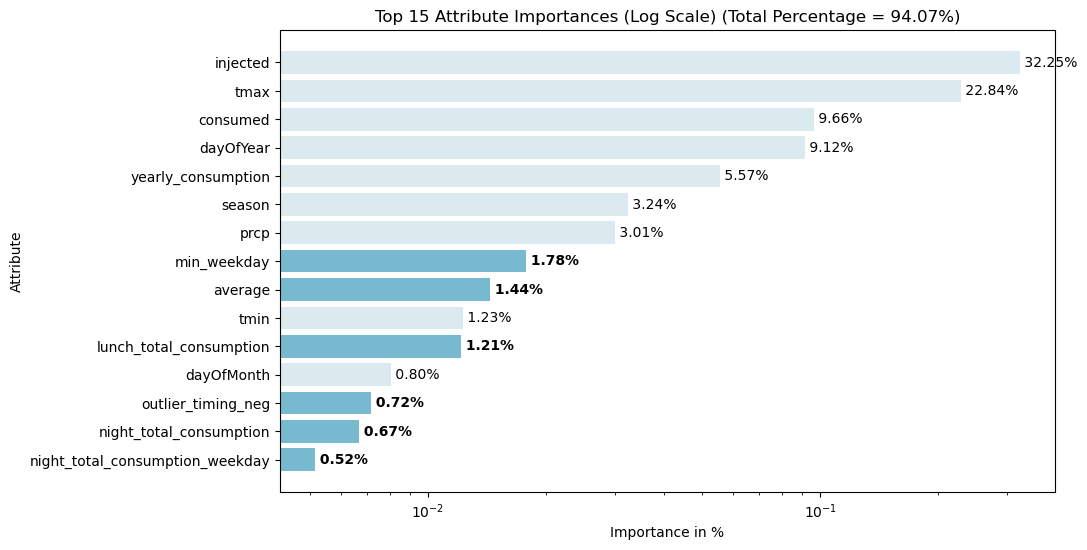

Total importance percentage covered by top 15 features: 94.07%


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_color = '#1D8DB0'
palette = sns.light_palette(base_color, n_colors=15)

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Extract top 15 features and their importances
top_features = [x[0] for x in sorted_feature_importances[:15]]
top_importances = [x[1] for x in sorted_feature_importances[:15]]

total_importance_percentage = sum(top_importances) * 100
# List of special features

# Plotting
plt.figure(figsize=(10, 6))
for feature, importance in zip(top_features, top_importances):
    color = palette[3]
    weight = 'normal'
    if feature in special_attributes or feature == "outlier_timing_neg":
        color = palette[14]
        weight = 'bold'
    plt.barh(feature, importance, color=color, alpha=0.6)
    plt.text(importance, feature, f' {importance:.2%}', ha='left', va='center', weight=weight)
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.xlabel('Importance in %')
plt.ylabel('Attribute')
plt.title(f'Top 15 Attribute Importances (Log Scale) (Total Percentage = {total_importance_percentage:.2f}%)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.savefig('notebooks/pictures/featureimportancesFlandersBig.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()
print(f'Total importance percentage covered by top 15 features: {total_importance_percentage:.2f}%')



In [7]:
from data_preprocessing.get_buffer_attributes import BufferAttributesCalculator
calculator = BufferAttributesCalculator(None)
column_names = list(calculator.column_functions.keys())
columns_weekday = [f"{column}_weekday" for column in column_names]
columns_weekend = [f"{column}_weekend" for column in column_names]

In [9]:
import pygraphviz as pgv
from io import StringIO

# DOT data stored in a variable
dot_data = tree.export_graphviz(loaded_model.tree, out_file=None, feature_names=attributes_df.columns.tolist(), filled=True, rounded=True)

# Convert DOT data to a file-like object
dot_file_object = StringIO(dot_data)

# Load DOT data
graph = pgv.AGraph(string=dot_file_object.read())

# List of special attributes
special_attributes = column_names + columns_weekday + columns_weekend

# Function to check if a node label contains a special attribute
def has_special_attribute(label):
    return any(attr in label for attr in special_attributes)

# Iterate through nodes and color nodes with special attributes
used_special_attributes = []
for node in graph.nodes():
    if has_special_attribute(node.attr['label']):
        node.attr['fillcolor'] = 'blue'
        special_attributes.append(node.attr['label'])

# Save the modified DOT file
output_dot_data = graph.to_string()
# Now you can use the modified DOT data as needed



In [33]:
for attribute in set(special_attributes):
    print(attribute)

night_peak_weekday <= 0.9\nsquared_error = 0.01\nsamples = 95630\nvalue = [[0.061]\n[0.054]\n[0.049]\n[0.046]\n[0.044]\n[0.043]\n[0.042]\n[0.042]\n[0.043]\n[0.044]\n[0.048]\n[0.058]\n[0.062]\n[0.073]\n[0.078]\n[0.084]\n[0.086]\n[0.087]\n[0.086]\n[0.084]\n[0.081]\n[0.079]\n[0.078]\n[0.08]\n[0.082]\n[0.084]\n[0.084]\n[0.082]\n[0.08]\n[0.081]\n[0.082]\n[0.086]\n[0.089]\n[0.096]\n[0.103]\n[0.112]\n[0.119]\n[0.124]\n[0.127]\n[0.125]\n[0.123]\n[0.122]\n[0.118]\n[0.114]\n[0.104]\n[0.093]\n[0.082]\n[0.07]]
night_peak <= 0.274\nsquared_error = 0.007\nsamples = 11505\nvalue = [[0.072]\n[0.065]\n[0.059]\n[0.057]\n[0.055]\n[0.053]\n[0.051]\n[0.05]\n[0.05]\n[0.049]\n[0.053]\n[0.058]\n[0.061]\n[0.068]\n[0.076]\n[0.08]\n[0.081]\n[0.087]\n[0.091]\n[0.085]\n[0.081]\n[0.08]\n[0.082]\n[0.087]\n[0.088]\n[0.087]\n[0.084]\n[0.082]\n[0.083]\n[0.085]\n[0.087]\n[0.091]\n[0.094]\n[0.097]\n[0.099]\n[0.103]\n[0.106]\n[0.114]\n[0.119]\n[0.119]\n[0.122]\n[0.125]\n[0.125]\n[0.125]\n[0.118]\n[0.106]\n[0.093]\n[0.081]

In [10]:


# Visualize the decision tree using Graphviz
graph = graphviz.Source(output_dot_data)
graph.render("decision_tree", format="pdf", cleanup=True, view=True)
graph.view("decision_tree")   

'decision_tree.pdf'